In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.integrate import simps
from numpy import trapz
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
y = df_train['index']
X = df_train.drop(columns='index')

In [4]:
y.describe()

count    201.000000
mean       1.400000
std        0.058168
min        1.300000
25%        1.350000
50%        1.400000
75%        1.450000
max        1.500000
Name: index, dtype: float64

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16)

In [6]:
import xgboost as xgb
xgbr = xgb.XGBRegressor()

xgbr.fit(X_train, y_train)
 
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 

[09:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:  0.9997589644792724


[09:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation scores:  [0.99353606 0.99853106 0.99480773 0.98756223 0.9984959 ]
Mean cross-validation score: 0.99
Mean cross-validation std: 0.00
[09:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

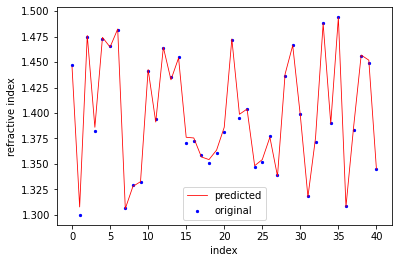

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

scores = cross_val_score(xgbr, X_train, y_train, cv=5)
print("Mean cross-validation scores: ", scores)
print("Mean cross-validation score: %.2f" % scores.mean())
print("Mean cross-validation std: %.2f" % scores.std())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV scores: ", kf_cv_scores)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("K-fold CV std: %.2f" % kf_cv_scores.std())

ypred = xgbr.predict(X_val)
mse = mean_squared_error(y_val, ypred)
mae = mean_absolute_error(y_val, ypred)
r2 = r2_score(y_val, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

x_ax = range(len(y_val))
plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.ylabel('refractive index')
plt.xlabel('index')
plt.legend()
plt.show()

In [8]:
y_test = df_test['index']
X_test = df_test.drop(columns='index')

MSE: 0.00
RMSE: 0.01
MAE: 0.01
R2: 0.96


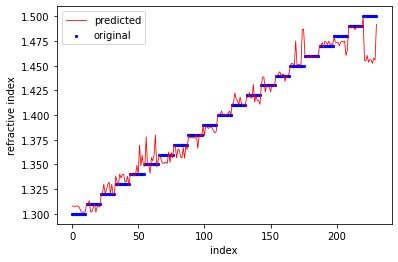

In [9]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.ylabel('refractive index')
plt.xlabel('index')
plt.legend()
plt.show()